inspiration from https://www.dataquest.io/blog/programming-best-practices-for-data-science/

In [1]:
import time
import pandas
print('Pandas version',pandas.__version__)

Pandas version 0.23.4


https://github.com/ResidentMario/missingno 

In [2]:
!pip install missingno

In [3]:
import missingno as msno

data source: 
https://www.lendingclub.com/info/download-data.action

In [4]:
start_time=time.time()
loans_2007 = pandas.read_csv('https://github.com/yhat/demo-lending-club/blob/master/model/LoanStats3a.csv?raw=true', 
                             skiprows=1, low_memory=False)
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 17.98 seconds


In [5]:
loans_2007.shape

(42535, 102)

In [6]:
loans_2007.head(6).T

,0,1,2,3,4,5
id,54734,55742,57245,57416,58915,59006
member_id,80364,114426,138150,139635,153417,154254
loan_amnt,25000,7000,1200,10800,7500,3000
funded_amnt,25000,7000,1200,10800,5025,3000
funded_amnt_inv,19080.1,672.804,1200,10691.6,557.087,2988.24
term,36 months,36 months,36 months,36 months,36 months,36 months
apr,13.62%,11.40%,16.22%,16.17%,10.77%,16.88%
int_rate,11.89%,10.71%,13.11%,13.57%,10.08%,14.26%
installment,829.1,228.22,40.5,366.86,162.34,102.92
grade,B,B,C,C,B,C


Black = filled (no nan); white = empty (nan)

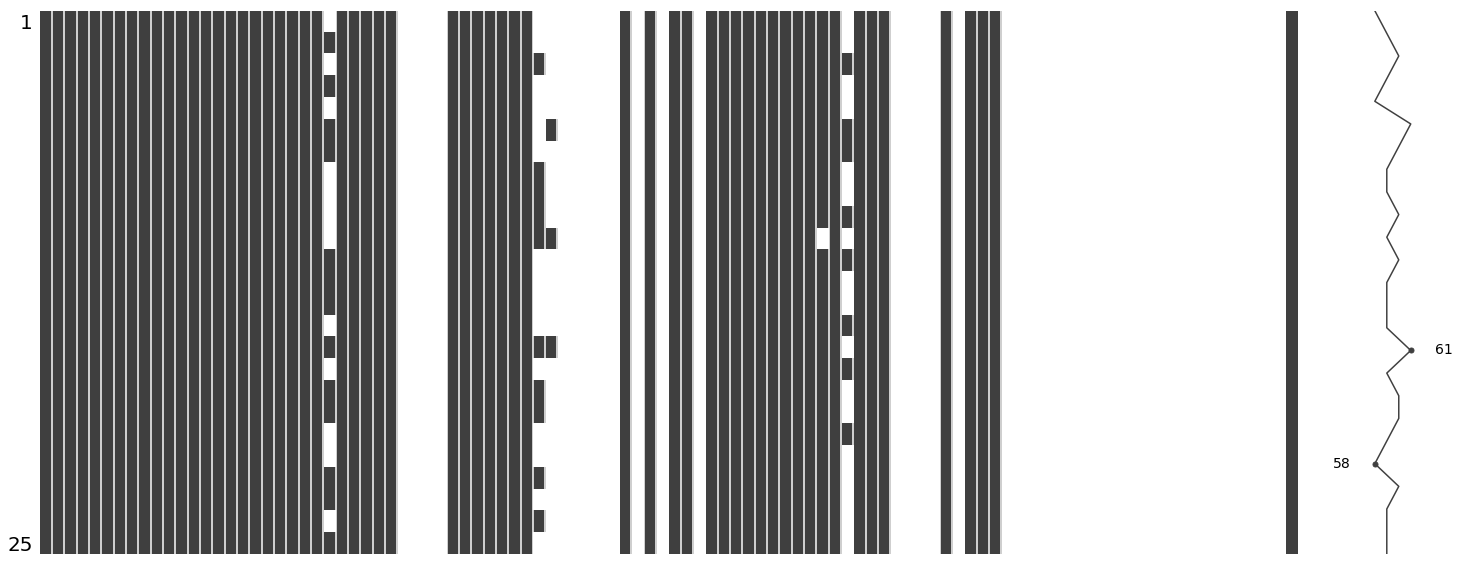

In [7]:
_=msno.matrix(loans_2007.sample(25))

"The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them."

source: https://github.com/ResidentMario/missingno

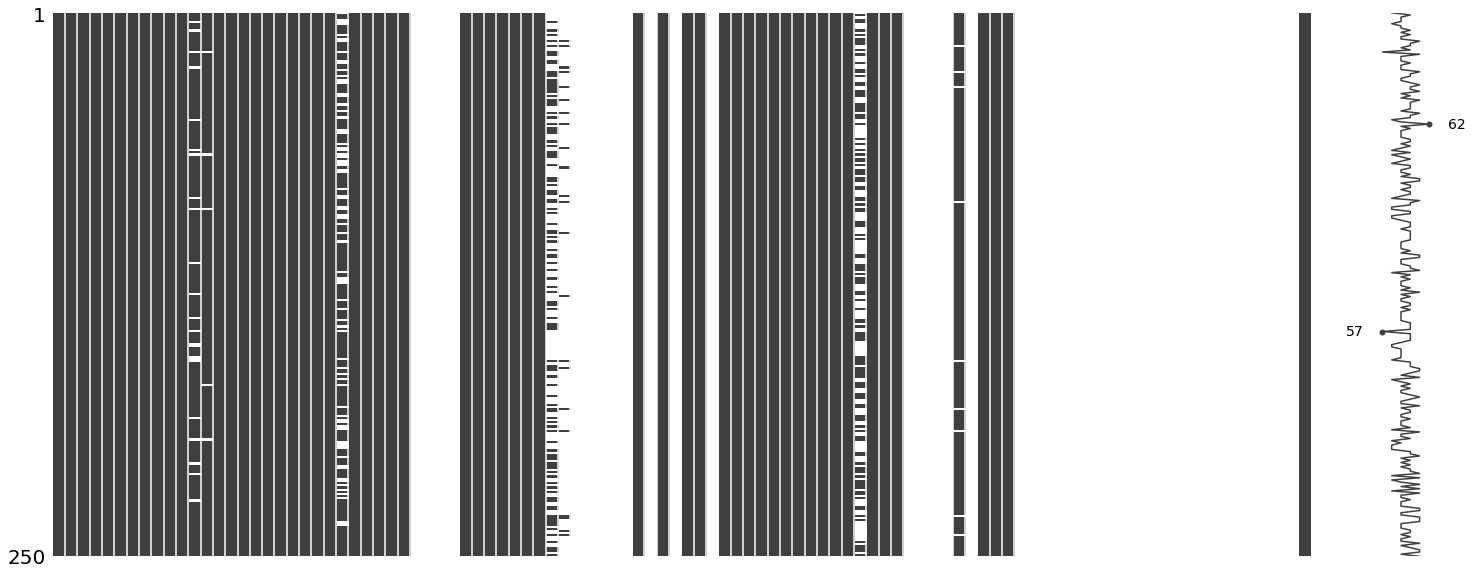

In [8]:
_=msno.matrix(loans_2007.sample(250))

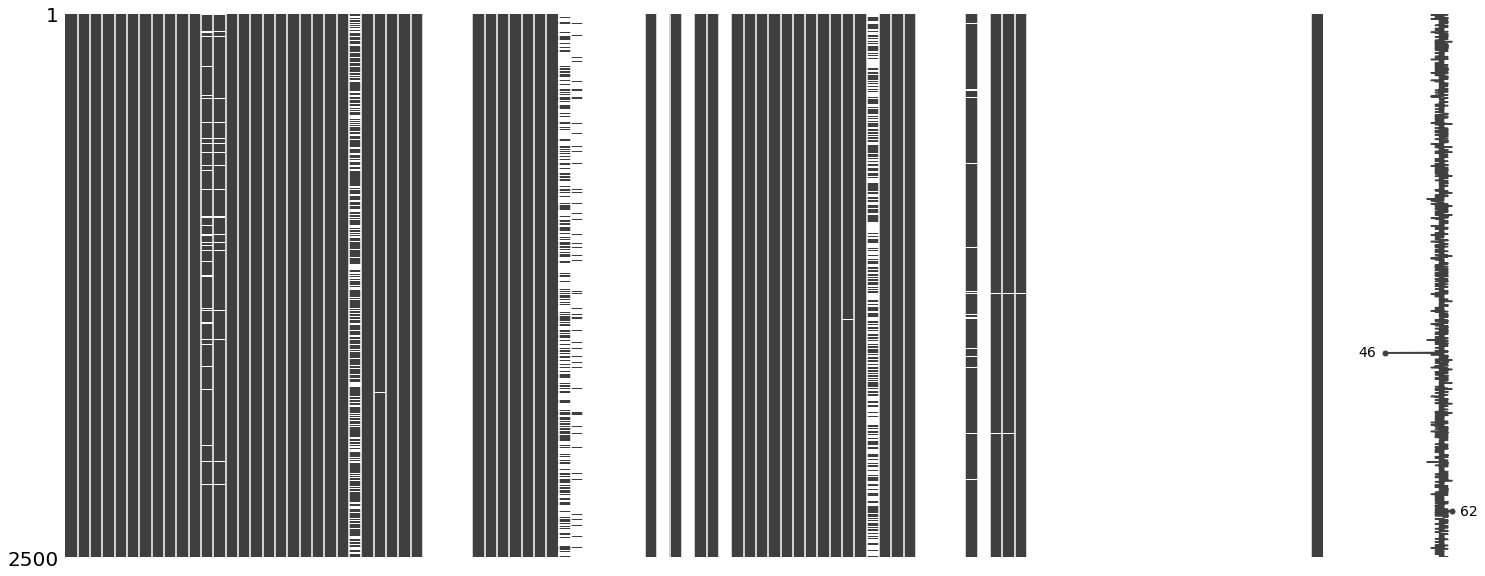

In [9]:
_=msno.matrix(loans_2007.sample(2500))

In [10]:
loans_2007.shape

(42535, 102)

In [11]:
loans_2007.drop(['id'],axis=1,inplace=True) # based on separate analysis

loans_2007.dropna(how='all',axis=0,inplace=True) # rows 
loans_2007.dropna(how='all',axis=1,inplace=True) # columns

# eliminate columns where all entries are same
for this_column in loans_2007.columns:
    if (loans_2007[this_column].nunique()==1):
        loans_2007.drop([this_column],axis=1,inplace=True)

loans_2007.shape

(42535, 57)

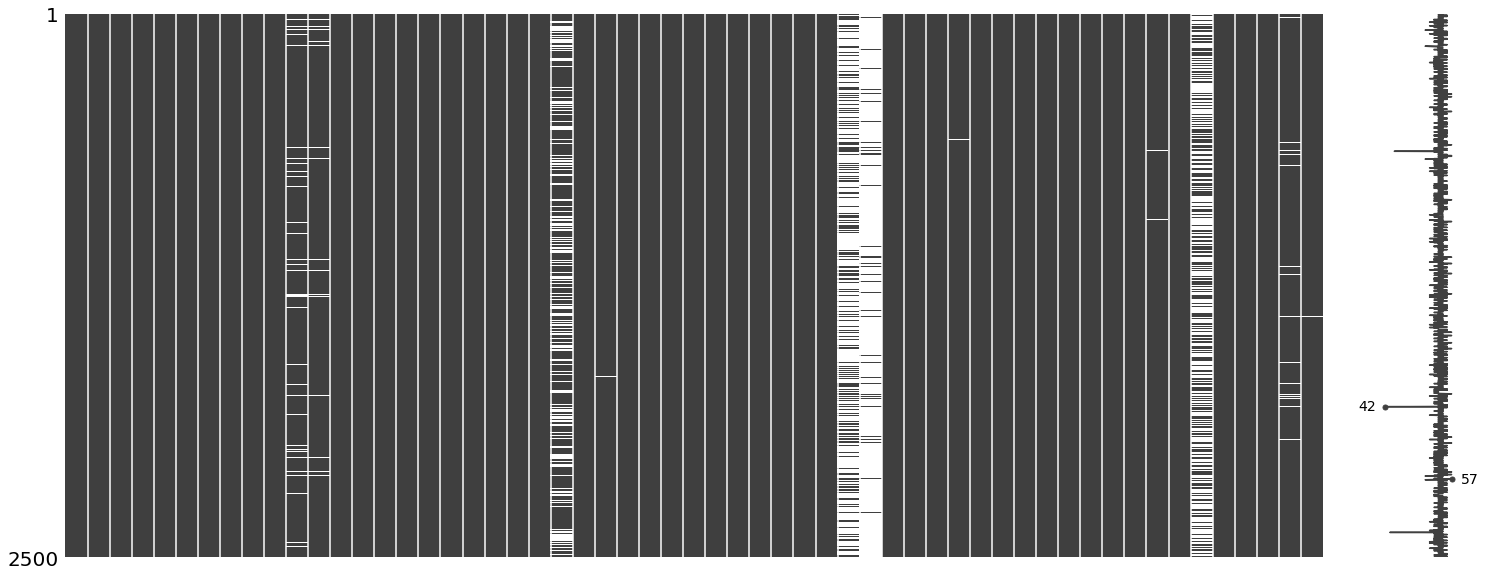

In [12]:
_=msno.matrix(loans_2007.sample(2500))

<BR>
<BR>
<BR>
<BR>

"The dendrogram uses a hierarchical clustering algorithm to bin variables against one another by their nullity correlation."

"Cluster leaves which linked together at a distance of zero fully predict one another's presence."

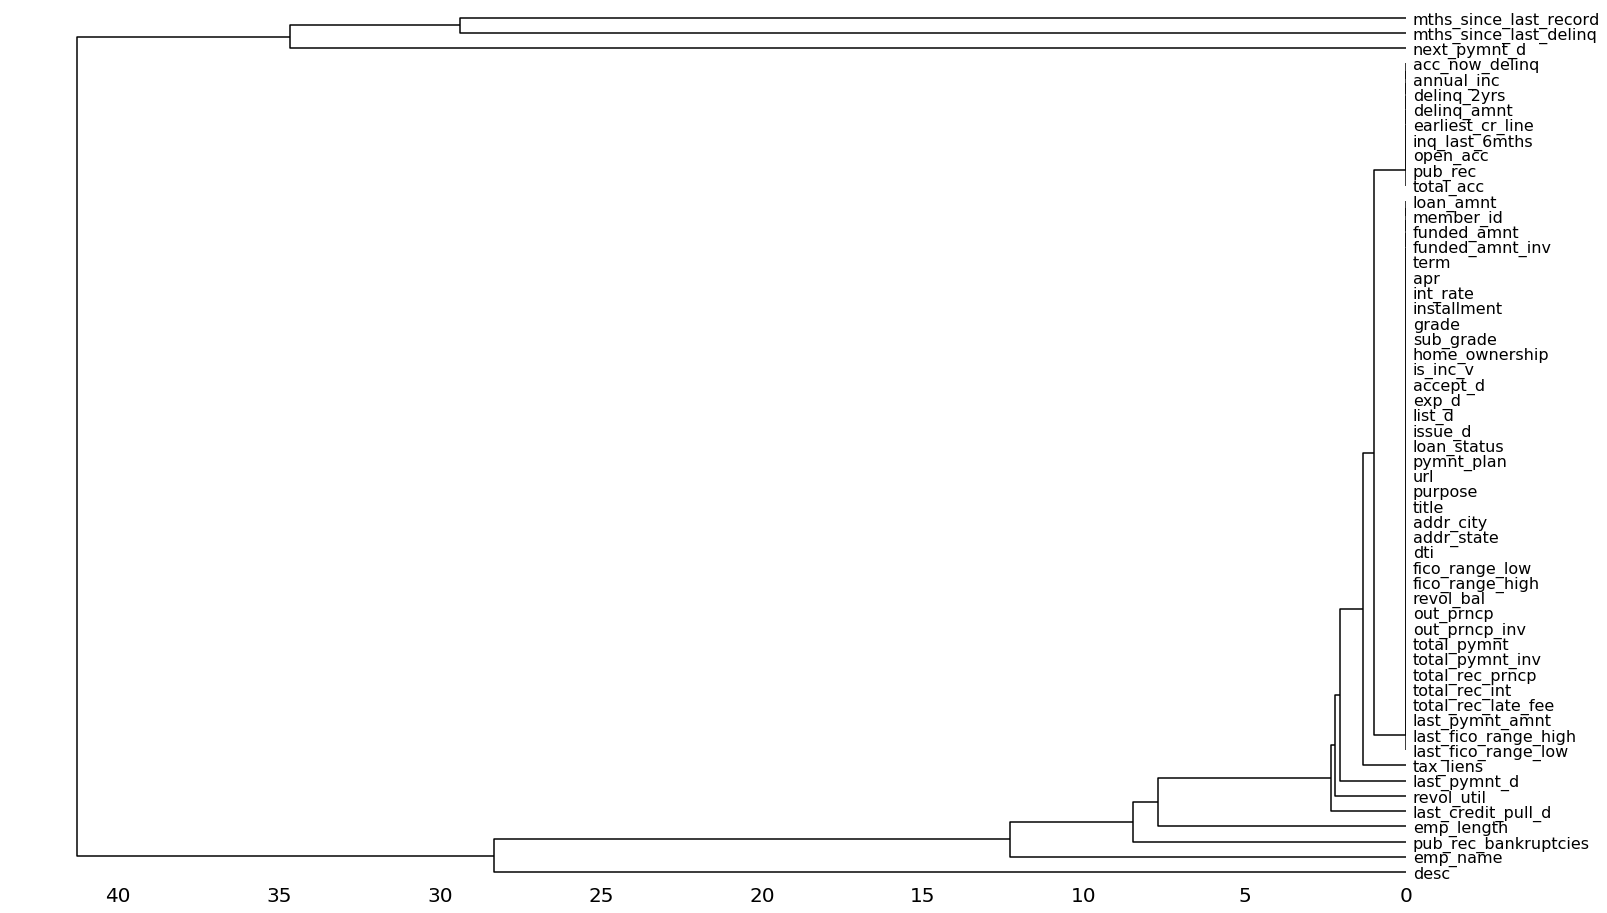

In [13]:
_=msno.dendrogram(loans_2007.sample(2500))